In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet_2.AutoUnet_2 import *
from NN_library.AutoUnet_2.train_AutoUnet_2 import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 8)

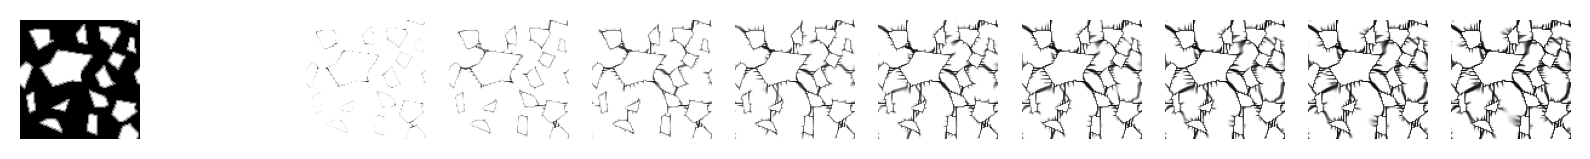

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [14]:
name = 'NN_library/AutoUnet_2/AutoUnet_2'
args = {'lr' : 0.0000001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [4]:
unet = AutoUNet(80)

In [5]:
torch.cuda.empty_cache() 

In [6]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 12026322


In [15]:
unet = load_network(unet, args['name']+'_19', args)

In [16]:
losses_train, losses_val = train(unet, loaders, args) 

Epoch: 0 batch: 0 mean train loss:  788.8725147843
Epoch: 0 batch: 100 mean train loss:  1059.7172382474
Epoch: 0 batch: 200 mean train loss:  659.8305364251
Epoch: 0 batch: 300 mean train loss:  998.0384764671
Epoch: 0 batch: 400 mean train loss:  1071.4083470702
Epoch: 0 batch: 500 mean train loss:  1359.5445870757
Epoch: 0 batch: 600 mean train loss:  1133.1917058229
Epoch: 0 batch: 700 mean train loss:  1003.2844740748
Epoch: 0 batch: 800 mean train loss:  902.9499363899
Epoch: 0 batch: 900 mean train loss:  850.4696877897
Epoch: 0 batch: 1000 mean train loss:  1114.8536238670
Epoch: 0 batch: 1100 mean train loss:  873.4156450033
Epoch: 0 batch: 1200 mean train loss:  1130.1143506169
Epoch: 0 batch: 1300 mean train loss:  1532.1941135526
Epoch: 0 batch: 1400 mean train loss:  1004.6146444678
Epoch: 0 mean train loss:  1071.0922032858 mean val. rec. loss:  1131.6785888672
Epoch: 1 batch: 0 mean train loss:  764.5595374107
Epoch: 1 batch: 100 mean train loss:  759.8966295719
Epoch: 1

KeyboardInterrupt: 

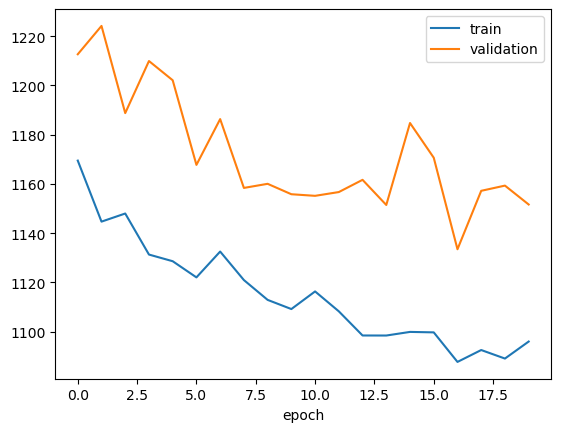

In [13]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])